In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from scipy import interpolate, integrate
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
branchingfractions_dtf = pd.read_csv('BFCalc/darkSUSY_BFs/BranchingFactors.dat', delimiter='\t')


branchingfractions = np.squeeze(np.array(list(branchingfractions_dtf.iloc)))[1:]
branchingfractions[0]

'   10.000000000000000        1.0000000000000000E-008   0.0000000000000000        1.0378850333402099E-049   0.0000000000000000        4.4365241407128310E-045   0.0000000000000000        1.1961342122771007E-042   1.0731768960356098E-047   4.2927058455958292E-047   3.9703060050698629E-042   1.2648359410883449E-044   0.0000000000000000        1.8907702685825177E-041   0.0000000000000000        0.0000000000000000        0.0000000000000000        8.4828835412886704E-044   0.0000000000000000        0.0000000000000000        0.0000000000000000     '

In [2]:
variables = [channel.strip() for channel in branchingfractions_dtf.columns[0].split(' | ')]
variablesdict = {idx:channel.replace(' + ','').replace('bar','').replace('anti-','') for idx, channel in enumerate(variables)}
darkSUSYchannel_list = list(variablesdict.values())

In [3]:

splitBFs = [np.array(unsplitBF.split(' ')) for unsplitBF in branchingfractions]
splitBFs = np.array([splitBF[np.where(splitBF)] for splitBF in splitBFs]).astype(float)
np.sum(splitBFs[:,2:],axis=1).shape

(50616,)

In [4]:
channel_params = splitBFs[:,[0,1,15]]
channel_params[:,2] = channel_params[:,2]/(np.sum(splitBFs[:,2:],axis=1))

In [5]:
masses = np.unique(channel_params[:,0])
lambdas = np.unique(channel_params[:,1])

massgrid, lambdagrid = np.meshgrid(masses, lambdas, indexing='ij')
massgrid.max()/1e3

1000.0000000000061

In [6]:
zi = griddata((channel_params[:,0], channel_params[:,1]), channel_params[:,2], (massgrid, lambdagrid))

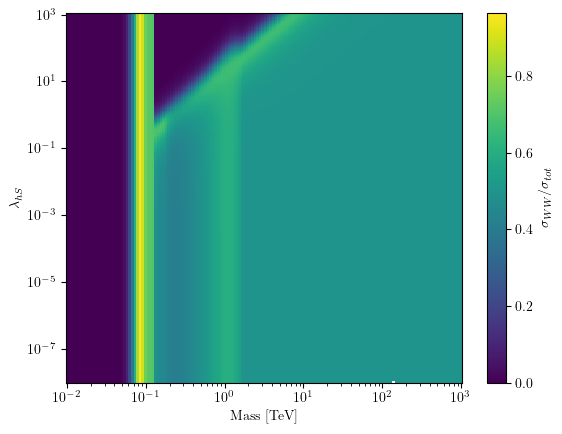

In [7]:
plt.figure()
plt.pcolormesh(masses/1000, lambdas, zi.T)#, norm=LogNorm(vmin=1e-2))
plt.colorbar(label=r'$\sigma_{WW}/\sigma_{tot}$')
plt.loglog()
plt.xlabel("Mass [TeV]")
plt.ylabel(r"$\lambda_{hS}$")
plt.show()

[]

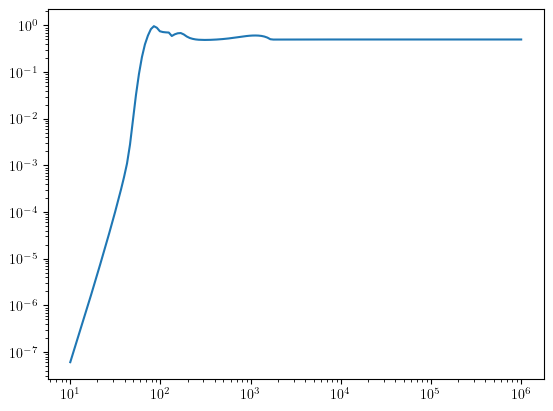

In [8]:
zi = griddata((channel_params[:,0], channel_params[:,1]), channel_params[:,2], (masses, masses*0+0.5))
zi = np.squeeze(zi)

plt.figure()
plt.plot(masses, zi)
plt.loglog()

In [9]:
splitBFs.shape

(50616, 21)

In [10]:
df = pd.DataFrame(splitBFs, columns=list(variablesdict.values()))
df.to_csv('BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', index=True, header=True, sep=' ')

In [11]:
df.head()

,mS [GeV],lahS,nuenue,e+e-,numunumu,mu+mu-,nutaunutau,tau+tau-,uu,dd,...,ss,tt,bb,gammagamma,W+W-,ZZ,gg,HH,Zgamma,hadrons (below confinement scale)
0,10.000000,1.000000e-08,0.0,1.037885e-49,0.0,4.436524e-45,0.0,1.196134e-42,1.073177e-47,4.292706e-47,...,1.264836e-44,0.0,1.890770e-41,0.000000e+00,0.000000e+00,0.000000e+00,8.482884e-44,0.0,0.0,0.0
1,10.792265,1.000000e-08,0.0,1.046890e-49,0.0,4.407819e-45,0.0,1.221221e-42,1.082488e-47,4.329951e-47,...,6.817516e-45,0.0,1.609609e-41,9.750127e-46,1.823328e-48,5.988314e-49,4.730270e-43,0.0,0.0,0.0
2,11.647297,1.000000e-08,0.0,1.057527e-49,0.0,4.450677e-45,0.0,1.240166e-42,1.093487e-47,4.373946e-47,...,6.737022e-45,0.0,1.625305e-41,1.146854e-45,2.924788e-48,9.584917e-49,4.295746e-43,0.0,0.0,0.0
3,12.570072,1.000000e-08,0.0,1.070122e-49,0.0,4.500950e-45,0.0,1.260514e-42,1.106510e-47,4.426039e-47,...,6.673289e-45,0.0,1.636777e-41,1.349072e-45,4.695867e-48,1.536033e-48,3.933667e-43,0.0,0.0,0.0
4,13.565954,1.000000e-08,0.0,1.085077e-49,0.0,4.562140e-45,0.0,1.282965e-42,1.121974e-47,4.487895e-47,...,6.624157e-45,0.0,1.646162e-41,1.589148e-45,7.591720e-48,2.478274e-48,3.653652e-43,0.0,0.0,0.0


In [12]:
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])

In [13]:
massvalues = np.unique(df.iloc[:,0])
lambdavalues = np.unique(df.iloc[:,1])

In [14]:
massvalues[0], massvalues[-1]

(10.0, 1000000.0000000062)

In [15]:
%%timeit
bfinterpolator(1.0, 0.1)

10.6 µs ± 245 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


2 nuenue
3 e+e-
4 numunumu
5 mu+mu-
6 nutaunutau
7 tau+tau-
8 uu
9 dd
10 cc
11 ss
12 tt
13 bb
14 gammagamma
15 W+W-
16 ZZ
17 gg
18 HH
19 Zgamma
20 hadrons (below confinement scale)


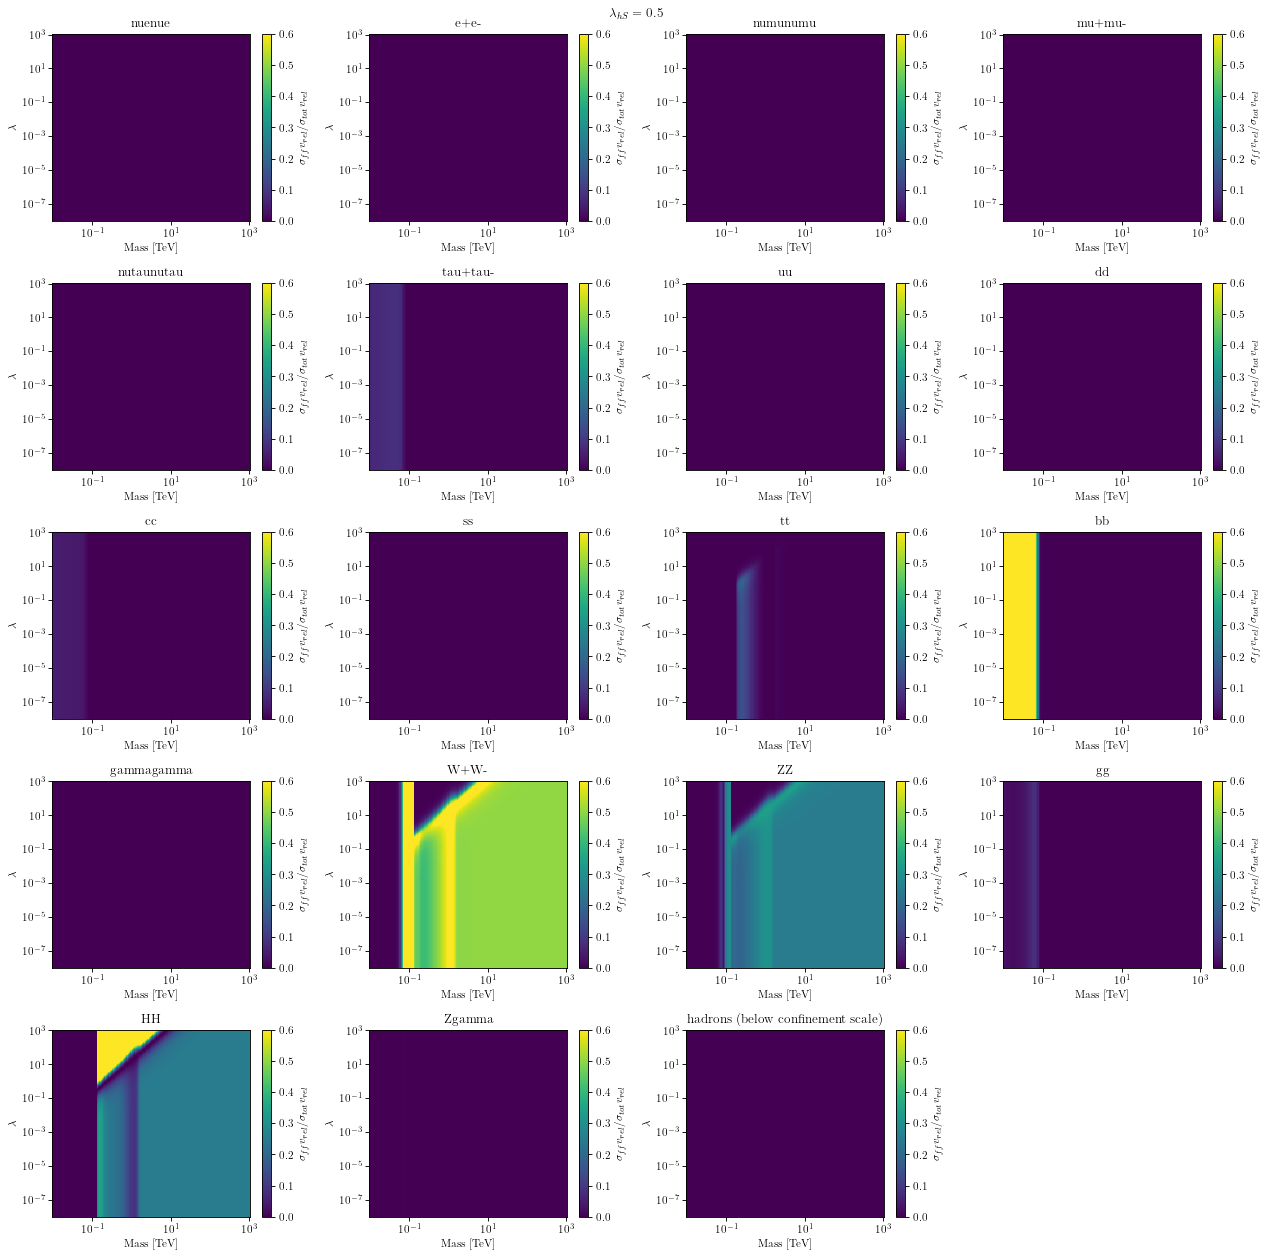

In [16]:
plt.figure(figsize=(16,16), dpi=80)
plt.suptitle(r"$\lambda_{hS}=0.5$")
massesabove0p1TeV = massvalues[massvalues>100]/1000
for idx, channel_name in enumerate(list(variablesdict.values())[2:]):
    print(idx+2, channel_name)
    plt.subplot(5,4, idx+1)
    plt.title(f"{channel_name}")
    plt.pcolormesh(massvalues/1000, lambdavalues, 
                   (splitBFs[:,idx+2]/np.sum(splitBFs[:,2:],axis=1)).reshape(lambdavalues.shape[0], massvalues.shape[0]), vmin=0, vmax=0.6)#,
                #    norm=LogNorm(vmin=1e-50))
    plt.xlabel('Mass [TeV]')
    plt.ylabel('$\lambda$')
    plt.loglog()
    plt.colorbar(label=r'$\sigma_{ff} v_{rel}/\sigma_{tot} v_{rel}$')
plt.tight_layout()
plt.show()

In [17]:
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])

In [18]:
bfinterpolator(1.0, 0.5)

array(nan)

In [19]:
splitBFs[:,15][np.abs(channel_params[:,0]-1.0).argmin()]

0.0

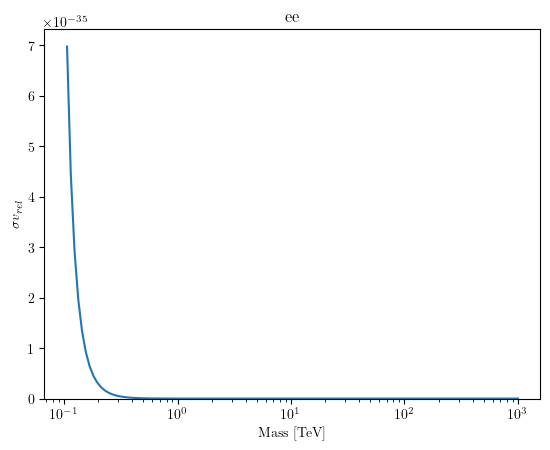

In [20]:
plt.title(f"ee")
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0]/1000, channel_params[:,1]),splitBFs[:,3])
plt.plot(massesabove0p1TeV, bfinterpolator(massesabove0p1TeV, 0.5))
plt.xlabel('Mass [TeV]')
plt.ylabel('$\sigma v_{rel}$')
plt.ylim([1e-50,None])
plt.xscale('log')

In [21]:
import sys
from gammapy.astro.darkmatter import (
    profiles,
    JFactory
)
from astropy import units as u
from astropy.coordinates import SkyCoord
from gammapy.maps import Map, MapAxis, MapAxes, WcsGeom
from utils3d import log10eaxistrue, longitudeaxistrue, latitudeaxistrue, aefffull, aeff_efficient
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])




profile = profiles.EinastoProfile()

# Adopt standard values used in HESS
profiles.DMProfile.DISTANCE_GC = 8.5 * u.kpc
profiles.DMProfile.LOCAL_DENSITY = 0.39 * u.Unit("GeV / cm3")

profile.scale_to_local_density()

position = SkyCoord(0.0, 0.0, frame="galactic", unit="deg")
geom = WcsGeom.create(skydir=position, 
                      binsz=longitudeaxistrue[1]-longitudeaxistrue[0],
                      width=(longitudeaxistrue[-1]-longitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0], latitudeaxistrue[-1]-latitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0]),
                      frame="galactic")


jfactory = JFactory(
    geom=geom, profile=profile, distance=profiles.DMProfile.DISTANCE_GC
)
jfact = jfactory.compute_differential_jfactor().to(u.TeV**2/(u.sr*u.cm**5)).value


partial_sigmav_interpolator_dictionary = {channel: interpolate.LinearNDInterpolator((channel_params[:,0]/1000, channel_params[:,1]),splitBFs[:,idx+2]) for idx, channel in enumerate(list(variablesdict.values())[2:])}
print(partial_sigmav_interpolator_dictionary)
jfactory.compute_differential_jfactor().unit



/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'nuenue': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fccfc248100>, 'e+e-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fccfc2487c0>, 'numunumu': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fccfc2484f0>, 'mu+mu-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fcd0812ba60>, 'nutaunutau': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fcd0812b220>, 'tau+tau-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fcd0812b430>, 'uu': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fcd0812b730>, 'dd': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fcd0812bee0>, 'cc': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fcd0812bd90>, 'ss': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fcd0812b880>, 'tt': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fcd0812bca0>, 'bb': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x

Unit("GeV2 / (cm5 sr)")

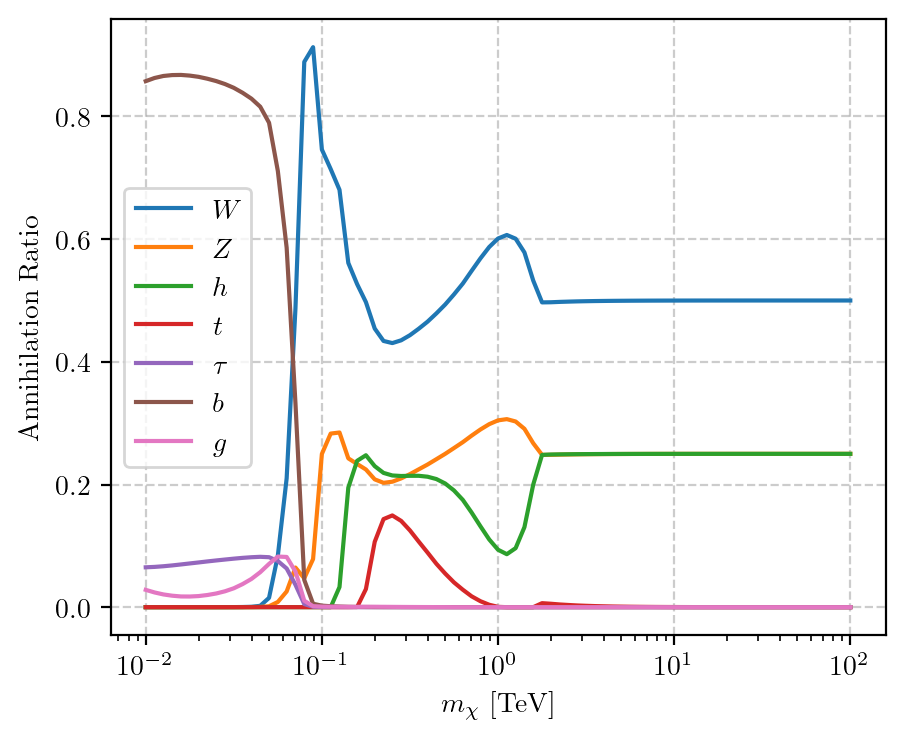

In [22]:
sigmavalues_dict = {}
testmassvalues = np.logspace(-2,2,81)
plt.figure(dpi=200, figsize=(5,4))

norms = 0
for channel, sigmavfunc in partial_sigmav_interpolator_dictionary.items():
    norms += sigmavfunc(testmassvalues, 0.1)
    sigmavalues_dict[channel] = sigmavfunc(testmassvalues, 0.1)
    

plt.plot(testmassvalues, sigmavalues_dict['W+W-']/norms, label=r'$W$')
plt.plot(testmassvalues, sigmavalues_dict['ZZ']/norms, label=r'$Z$')
plt.plot(testmassvalues, sigmavalues_dict['HH']/norms, label=r'$h$')
plt.plot(testmassvalues, sigmavalues_dict['tt']/norms, label=r'$t$')

plt.plot(testmassvalues, sigmavalues_dict['tau+tau-']/norms, label=r'$\tau$')
plt.plot(testmassvalues, sigmavalues_dict['bb']/norms, label=r'$b$')
plt.plot(testmassvalues, sigmavalues_dict['gg']/norms, label=r'$g$')


plt.ylabel('Annihilation Ratio')
plt.xlabel(r'$m_\chi$ [TeV]')

plt.grid(axis='both', alpha=0.4, c='grey', ls='--')


plt.xscale('log')
plt.legend()
plt.show()

    


In [24]:
from BFCalc.createspectragrids import singlechannel_diffflux

darkSUSY_to_Gammapy_converter = {
    "nuenue":"nu_e",
    "e+e-": "e",
    "numunumu":"nu_mu",
    "mu+mu-":"mu",
    'nutaunutau':"nu_tau",
    "tau+tau-":"tau",
    "cc": "c",
    "bb": "b",
    "tt": "t",
    "W+W-": "W",
    "ZZ": "Z",
    "gg": "g",
    "gammagamma": "gamma",
    "HH": "h",
}


    

In [25]:
def calc_signal_fraction(log10eaxis, longitudeaxis, latitudeaxis, mass, coupling, partial_sigmav_interpolator_dictionary, aeff, diff_J_factor_grid, energy_spectra_dictionary, tobs, numevents):
    
    from scipy.integrate import simpson
    
    print("Start.")
    
    logenergymesh, longitudemesh, latitudemesh = np.meshgrid(log10eaxis, longitudeaxis, latitudeaxis, indexing='ij')

    truecoords = np.array([longitudemesh.flatten(), latitudemesh.flatten()])
    offsets  = np.linalg.norm(truecoords, axis=0)
    
    print("Grid made.")
    
    aeff_values  = aeff(logenergymesh.flatten(), offsets).reshape(logenergymesh.shape)
    
    channels = partial_sigmav_interpolator_dictionary.keys()
    
    print("Aeff calculated and channel names extracted.")
    
    singlechannel_energyspectra = {channel:np.array([energy_spectra_dictionary[channel](np.log10(massval), 
                                                                              np.log10(massval)-log10eaxis.flatten()) for massval in mass]).reshape(mass.shape[0], log10eaxis.shape[0]) for channel in channels}
    
    print("Extracted final state spectra")
    
    print(singlechannel_energyspectra['W+W-'].shape)
    
    partialsigmavmesh_mass, partialsigmavmesh_coupling = np.meshgrid(mass, coupling, indexing='ij')
    partial_sigmav_dictionary = {channel:partial_sigmav_interpolator_dictionary[channel](partialsigmavmesh_mass.flatten(), partialsigmavmesh_coupling.flatten()).reshape(partialsigmavmesh_mass.shape) for channel in channels}
    print(partial_sigmav_dictionary['W+W-'].shape)
    
    print("Extracted final state partial sigma v")

    single_channel_flux_grid = {channel:aeff_values[np.newaxis, :,:,:]*diff_J_factor_grid[np.newaxis, np.newaxis,:,:]*singlechannel_energyspectra[channel][:,:,np.newaxis, np.newaxis] for channel in channels}
    print(single_channel_flux_grid['W+W-'].shape)
    
    print("Extracted grid of flux values for each channel")
    
    single_channel_integrated = {channel:simpson(y=simpson(y=simpson(single_channel_flux_grid[channel], x=10**log10eaxis, axis=1), x=longitudeaxis, axis=1), x=latitudeaxis, axis=1) for channel in channels}
    print(single_channel_integrated['W+W-'].shape)
    print("Integrated flux for each channel calculated.")
    # Terms that don't depend on energy or sky position
    signalfraction = tobs/(4*np.pi*mass*numevents)
    
    
    # Including the integrated terms that depend on energy and sky position
    signalfraction = signalfraction[:, np.newaxis]*np.sum([single_channel_integrated[channel][:,np.newaxis]*partial_sigmav_dictionary[channel] for channel in channels], axis=0)
    
    print("Signal fraction calculation completed returning result.")
    
    return signalfraction

In [26]:
channelfuncdictionary = {}
modulefolderpath = 'BFCalc'
massvalues          = np.load(modulefolderpath+f"/griddata/massvals_massenergy_diffflux_grid.npy")/1e3
log10xvals        = np.load(modulefolderpath+f"/griddata/log10xvals_massenergy_diffflux_grid.npy")

for darkSUSYchannel in darkSUSYchannel_list:
    try:
        gammapychannel = darkSUSY_to_Gammapy_converter[darkSUSYchannel]
        tempspectragrid = np.load(modulefolderpath+f"/griddata/channel={gammapychannel}_massenergy_diffflux_grid.npy")
        channelfuncdictionary[darkSUSYchannel] = interpolate.interp2d(np.log10(massvalues), log10xvals, np.array(tempspectragrid).T, 
                                    kind='linear', bounds_error=False, fill_value=1e-3000)
    except:
        channelfuncdictionary[darkSUSYchannel] = lambda logmass, log10x: log10x*0
    
channelfuncdictionary['W+W-'](0, -log10eaxistrue.flatten()).reshape(log10eaxistrue.shape)

array([2.15369780e+00, 2.10346186e+00, 2.05322592e+00, 2.00298998e+00,
       1.95275404e+00, 1.90251810e+00, 1.85679915e+00, 1.81108020e+00,
       1.76536126e+00, 1.71964231e+00, 1.67392336e+00, 1.63245851e+00,
       1.59099367e+00, 1.54952883e+00, 1.50806398e+00, 1.46659914e+00,
       1.42887595e+00, 1.39115275e+00, 1.35342956e+00, 1.31570637e+00,
       1.27798318e+00, 1.24414456e+00, 1.21030594e+00, 1.17646732e+00,
       1.14262870e+00, 1.10879008e+00, 1.07857125e+00, 1.04835243e+00,
       1.01813360e+00, 9.87914779e-01, 9.57695955e-01, 9.30870802e-01,
       9.04045649e-01, 8.77220496e-01, 8.50395344e-01, 8.23570191e-01,
       7.99892973e-01, 7.76215755e-01, 7.52538537e-01, 7.28861319e-01,
       7.05184102e-01, 6.84370573e-01, 6.63557045e-01, 6.42743516e-01,
       6.21929988e-01, 6.01116459e-01, 5.82804960e-01, 5.64493460e-01,
       5.46181961e-01, 5.27870462e-01, 5.09558962e-01, 4.93686519e-01,
       4.77814075e-01, 4.61941631e-01, 4.46069187e-01, 4.30196743e-01,
      

In [27]:
lambdamin = 1e-8
lambdamax = 1e2

massmin = 1e-1
massmax = 1e2

lambdavalues = np.logspace(np.log10(lambdamin),np.log10(lambdamax),int((np.log10(lambdamax)-np.log10(lambdamin))*40)+1)
massvalues = np.logspace(np.log10(massmin), np.log10(massmax),int((np.log10(massmax)-np.log10(massmin))*40)+1)

signalfrac_values = calc_signal_fraction(log10eaxistrue, longitudeaxistrue, latitudeaxistrue, massvalues, lambdavalues, partial_sigmav_interpolator_dictionary, aeff_efficient, jfact.T, channelfuncdictionary, 525*60*60, 1e8)


Start.
Grid made.
Aeff calculated and channel names extracted.
Extracted final state spectra
(121, 341)
(121, 401)
Extracted final state partial sigma v
(121, 341, 35, 30)
Extracted grid of flux values for each channel
(121,)
Integrated flux for each channel calculated.
Signal fraction calculation completed returning result.


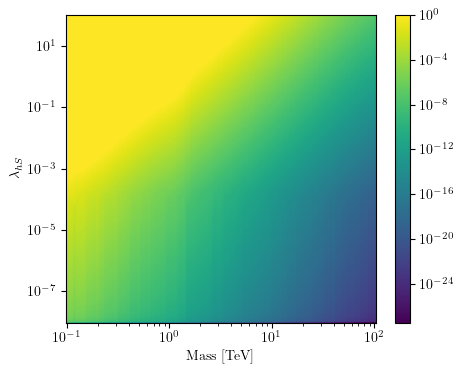

In [28]:
massmesh, lambdamesh = np.meshgrid(massvalues, lambdavalues, indexing='ij')

plt.figure(figsize=(5,4))
plt.pcolormesh(massmesh, lambdamesh, signalfrac_values, norm=LogNorm(vmax=1))
plt.loglog()
plt.colorbar()
plt.ylabel(r'$\lambda_{hS}$')
plt.xlabel(r'Mass [TeV]')
plt.show()

In [29]:
signalfrac_values[np.where(signalfrac_values==np.nan)]

array([], dtype=float64)

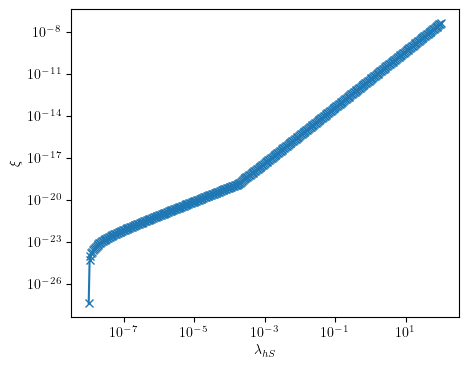

In [30]:
plt.figure(figsize=(5,4))

plt.plot(lambdavalues, signalfrac_values[-1,:], marker='x')
plt.xlabel(r'$\lambda_{hS}$')
plt.ylabel(r'$\xi$')
plt.loglog()
plt.show()

In [31]:
signalfrac_values[signalfrac_values<1].size

40138

In [32]:
161*121

19481

In [112]:
mass_lambda_signalfrac_array = np.array([massmesh.flatten(), lambdamesh.flatten(), signalfrac_values.flatten()]).T
np.savetxt('BFCalc/coupling_estimation_values/coupling_estimation_values.csv', mass_lambda_signalfrac_array)
mass_lambda_signalfrac_array[:5,:]

array([[1.00000000e-01, 1.00000000e-08, 3.80130175e-10],
       [1.00000000e-01, 1.05925373e-08, 2.24264573e-07],
       [1.00000000e-01, 1.12201845e-08, 4.61415003e-07],
       [1.00000000e-01, 1.18850223e-08, 7.12617480e-07],
       [1.00000000e-01, 1.25892541e-08, 9.78704639e-07]])

(0.0, 1e-09)

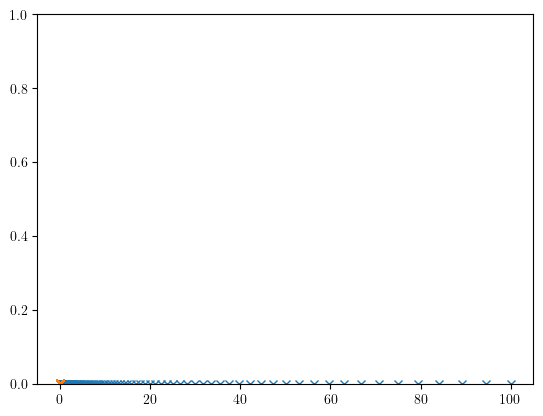

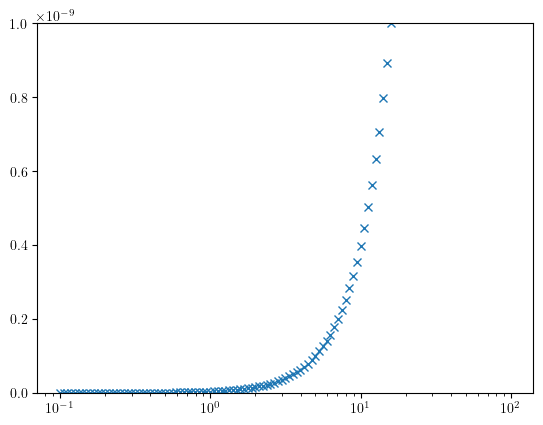

In [34]:

plt.figure()
plt.plot(mass_lambda_signalfrac_array[:,1][-121:], mass_lambda_signalfrac_array[:,2][-121:], ls='None', marker='x')
plt.plot(mass_lambda_signalfrac_array[:,1][:121], mass_lambda_signalfrac_array[:,2][:121], ls='None', marker='x')

plt.ylim([0,1])


plt.figure()
plt.plot(mass_lambda_signalfrac_array[:,1][-121:], mass_lambda_signalfrac_array[:,2][-121:], ls='None', marker='x')
plt.xscale('log')
plt.ylim([0,1e-9])

In [35]:
signalfracinterpolator = interpolate.LinearNDInterpolator((mass_lambda_signalfrac_array[:,0], mass_lambda_signalfrac_array[:,1]), mass_lambda_signalfrac_array[:,2])

[]

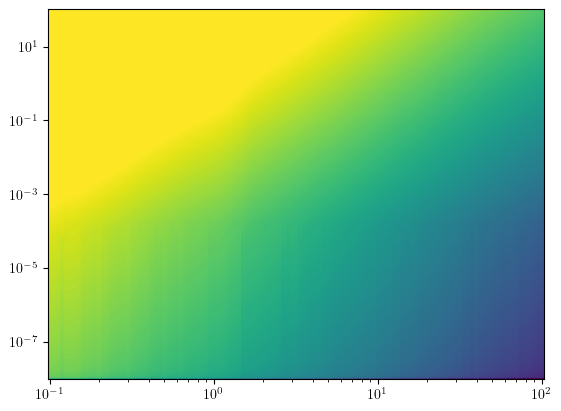

In [36]:
plt.figure()
plt.pcolormesh(massmesh, lambdamesh, signalfracinterpolator(massmesh, lambdamesh), norm=LogNorm(vmax=1))
plt.loglog()

In [37]:
higgscoupling_interpolator = interpolate.LinearNDInterpolator(mass_lambda_signalfrac_array[:,[0,2]],  mass_lambda_signalfrac_array[:,1], )

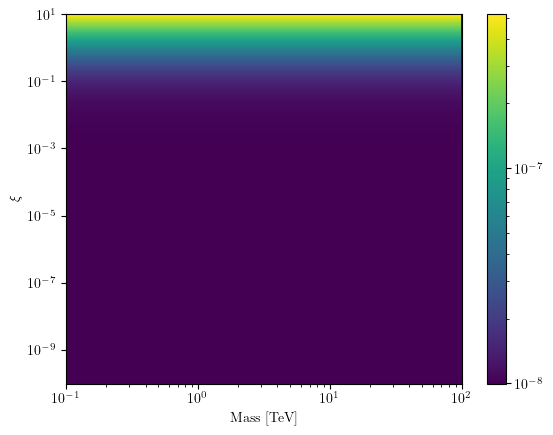

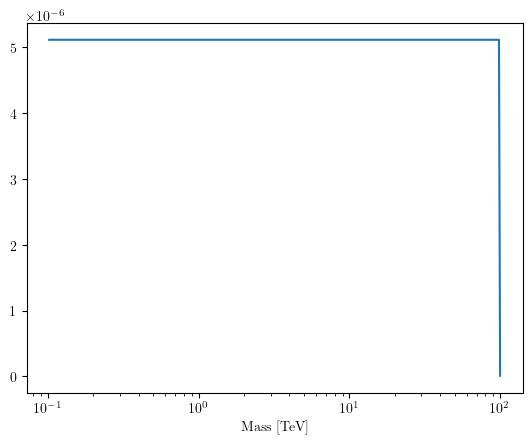

In [38]:

massvalues = np.logspace(-1, 2, 401)
sigfrac_test_values = np.logspace(-10, 1, 701)
testmassmesh, test_sigfrac_mesh = np.meshgrid(massvalues, sigfrac_test_values, indexing='ij')

couplingvalues = higgscoupling_interpolator(testmassmesh, test_sigfrac_mesh)
# couplingvalues[np.isnan(couplingvalues)] = couplingvalues[np.isnan(couplingvalues)+1]

plt.figure()
plt.pcolormesh(testmassmesh, test_sigfrac_mesh, couplingvalues, norm=LogNorm())
plt.xlabel('Mass [TeV]')
plt.ylabel(r'$\xi$')
plt.colorbar()
plt.xscale('log')
plt.loglog()


plt.figure()
plt.plot(massvalues, higgscoupling_interpolator(massvalues, 100), )
plt.xlabel('Mass [TeV]')
plt.xscale('log')


In [39]:
couplingvalues[np.isneginf(couplingvalues)]

array([], dtype=float64)

In [40]:
higgscoupling_interpolator(0.1,1.0)

array(nan)

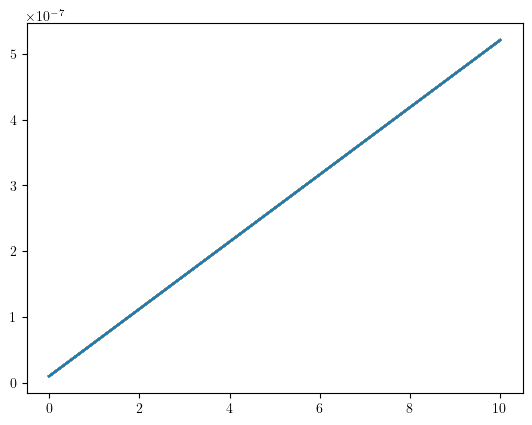

In [41]:
testmass = 10

sigfrac_test_values = np.logspace(-10,1,111)

plt.figure()
for massval in np.logspace(-1, 1, 31):
    plt.plot(sigfrac_test_values, higgscoupling_interpolator(massval, sigfrac_test_values), label=f'{massval}')
# plt.legend()
# plt.loglog()
# plt.xlim([8e-11,1e-9])


In [42]:
higgscoupling_interpolator(1e-1, 5.00001e-3)

array(1.02553207e-08)

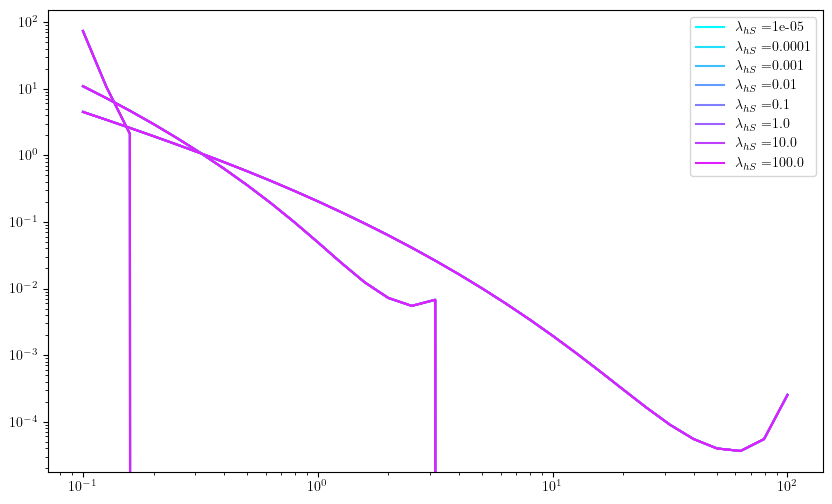

In [43]:
channel_test_names = list(partial_sigmav_interpolator_dictionary.keys())
from matplotlib.pyplot import get_cmap
from scipy import special

cmap = get_cmap('cool')
# partial_sigmav_interpolator_dictionary, channelfuncdictionary
massvalues_test = np.logspace(-0.8, 2, 3)
couplingvalues_test = np.logspace(-5,2,8)
energyvalues_test = np.logspace(-1,2,31)
# 
spectralvals = lambda massval, couplingval: np.exp(special.logsumexp([np.log(float(partial_sigmav_interpolator_dictionary[channel](massval, couplingval)))+np.log(np.squeeze(channelfuncdictionary['W+W-'](np.log10(massval), np.log10(energyvalues_test)-np.log10(massval)))) for channel in channel_test_names], axis=0))

lognormspectralvals = lambda massval, couplingval: special.logsumexp(np.log(spectralvals(massval,couplingval))+np.log(energyvalues_test))

plt.figure(figsize=(10,6))

for massval in massvalues_test:
    for counter, couplingval in enumerate(couplingvalues_test):
        # print(massval, couplingval, float(partial_sigmav_interpolator_dictionary['W+W-'](massval, couplingval)))
        plt.plot(energyvalues_test, 
                 spectralvals(massval, couplingval)/integrate.simpson(y=spectralvals(massval, couplingval), x=energyvalues_test),
                 color=cmap(counter/couplingvalues_test.shape[0]), label=f"{massval}, {couplingval}")
        

plt.loglog()
plt.legend([r"$\lambda_{hS}=$"+f"{couplingval}" for couplingval in couplingvalues_test])
plt.show()

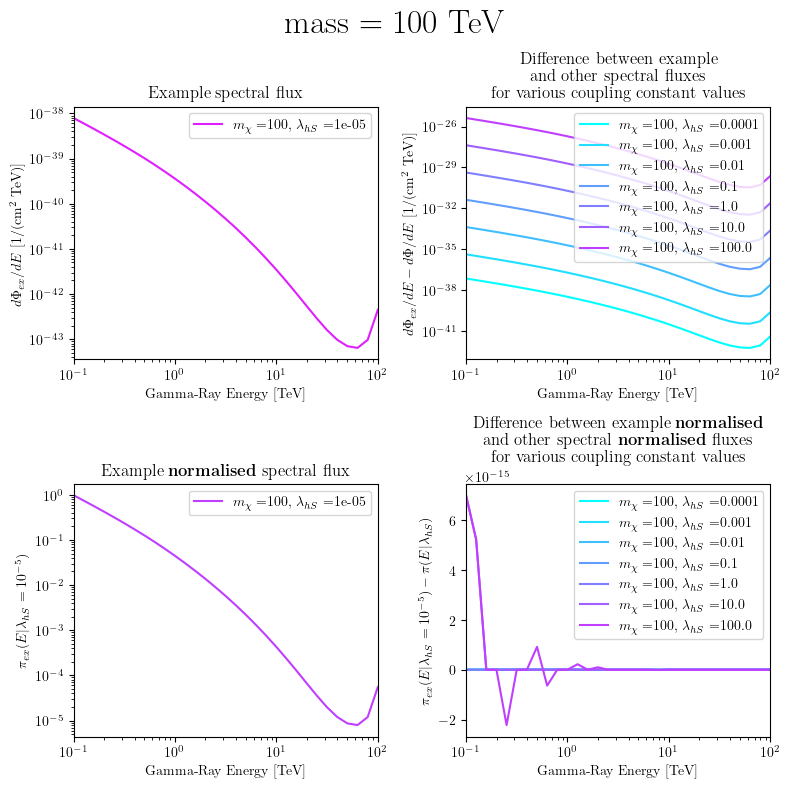

In [44]:
testmass = 100



plt.figure(figsize=(8,8))


plt.suptitle(f"mass = {testmass} TeV", fontsize=24)



plt.subplot(2,2,1)
plt.title('Example spectral flux')

plt.xlim([energyvalues_test[0], energyvalues_test[-1]])


basespectra = spectralvals(testmass, couplingvalues_test[0])


plt.plot(energyvalues_test, 
            basespectra,
            color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingvalues_test[0]}")

plt.loglog()
plt.legend([r"$\lambda_{hS}=$"+f"{couplingval}" for couplingval in couplingvalues_test])
plt.legend()


plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$d\Phi_{ex}/dE$ [1/(cm$^2$ TeV)]')




plt.subplot(2,2,2)
plt.title(
r'''Difference between example 
    and other spectral fluxes
    for various coupling constant values''')



basespectra = spectralvals(testmass, couplingvalues_test[0])


for counter, couplingval in enumerate(couplingvalues_test[1:]):
    plt.xlim([energyvalues_test[0], energyvalues_test[-1]])
    plt.plot(energyvalues_test, 
            np.exp(np.log(spectralvals(testmass, couplingval)))-basespectra,
            color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingval}")
    
    
plt.legend()
plt.loglog()


plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$d\Phi_{ex}/dE-d\Phi/dE$ [1/(cm$^2$ TeV)]')




plt.subplot(2,2,3)


plt.title(r'Example \textbf{normalised} spectral flux')



plt.xlim([energyvalues_test[0], energyvalues_test[-1]])

basespectra = np.exp(np.log(spectralvals(testmass, couplingvalues_test[0])) - lognormspectralvals(testmass, couplingvalues_test[0]))


plt.plot(energyvalues_test, 
         basespectra,
         color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingvalues_test[0]}")

plt.loglog()
plt.legend([r"$\lambda_{hS}=$"+f"{couplingval}" for couplingval in couplingvalues_test])
plt.legend()
plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$\pi_{ex}(E|\lambda_{hS}=10^{-5})$')



plt.subplot(2,2,4)
plt.title(
r'''Difference between example \textbf{normalised} 
    and other spectral \textbf{normalised} fluxes
    for various coupling constant values''')



plt.xlim([energyvalues_test[0], energyvalues_test[-1]])

basespectra = np.exp(np.log(spectralvals(testmass, couplingvalues_test[0])) - lognormspectralvals(testmass, couplingvalues_test[0]))

for counter, couplingval in enumerate(couplingvalues_test[1:]):
    plt.plot(energyvalues_test, 
            np.exp(np.log(spectralvals(testmass, couplingval))-lognormspectralvals(testmass, couplingval))-basespectra,
            color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingval}")
plt.xscale('log')
plt.legend()
plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$\pi_{ex}(E|\lambda_{hS}=10^{-5})-\pi(E|\lambda_{hS})$')





plt.tight_layout()
plt.show()

In [45]:
lognormspectralvals(1.0, couplingval)

-51.05725775186632

In [106]:

darkSUSY_BFs_cleaned = pd.read_csv('BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', delimiter=' ')

darkSUSY_massvalues = darkSUSY_BFs_cleaned.iloc[:,1]/1e3

darkSUSY_lambdavalues = darkSUSY_BFs_cleaned.iloc[:,2]

channelfuncdictionary = {}


log10xvals = np.load(modulefolderpath+f"/griddata/log10xvals_massenergy_diffflux_grid.npy")
massvalues = np.load(modulefolderpath+f"/griddata/massvals_massenergy_diffflux_grid.npy")

for darkSUSYchannel in list(darkSUSY_to_Gammapy_converter.keys()):
    try:
        gammapychannel = darkSUSY_to_Gammapy_converter[darkSUSYchannel]
        
        tempspectragrid = np.load(modulefolderpath+f"/griddata/channel={gammapychannel}_massenergy_diffflux_grid.npy")
        
        channelfuncdictionary[darkSUSYchannel] = interpolate.interp2d(np.log10(massvalues/1e3), log10xvals, np.array(tempspectragrid).T, 
                                    kind='linear', bounds_error=False, fill_value=1e-3000)
    except:
        channelfuncdictionary[darkSUSYchannel] = lambda logmass, log10x: log10x*0


partial_sigmav_interpolator_dictionary = {channel: interpolate.LinearNDInterpolator((darkSUSY_massvalues, darkSUSY_lambdavalues),darkSUSY_BFs_cleaned.iloc[:,idx+3]) for idx, channel in enumerate(list(darkSUSY_to_Gammapy_converter.keys()))}



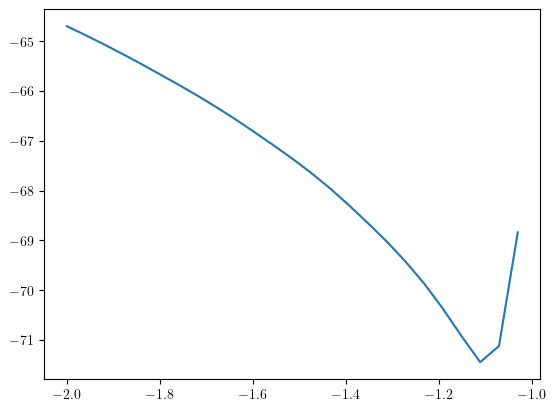

In [110]:
massval = 0.1

plt.figure()
plt.plot(np.linspace(-2,2,100), special.logsumexp([np.log(float(partial_sigmav_interpolator_dictionary[channel](massval, 0.1)))+np.log(channelfuncdictionary[channel](np.log10(massval), np.linspace(-2,2,100)-np.log10(massval))) for channel in darkSUSY_to_Gammapy_converter.keys()], axis=0))
plt.show()


In [103]:
float(partial_sigmav_interpolator_dictionary['W+W-'](1.0, 0.1))


5.12011189319232e-38

In [90]:
darkSUSY_massvalues

0        1.000000e+01
1        1.079226e+01
2        1.164730e+01
3        1.257007e+01
4        1.356595e+01
             ...     
50611    7.371395e+05
50612    7.955404e+05
50613    8.585683e+05
50614    9.265896e+05
50615    1.000000e+06
Name: mS [GeV], Length: 50616, dtype: float64